In [ ]:
#!pip install seaborn

In [65]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
from sklearn import datasets, neighbors, linear_model
import random
import pandas as pd
import numpy as np

In [66]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd
import numpy as np

In [82]:
# Load data
titanic = sns.load_dataset("titanic")

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [84]:
# Drop duplicated columns
titanic = titanic.drop(['class','who','embarked'],axis=1)

In [85]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,True,NaN,Southampton,no,True


In [74]:
titanic.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

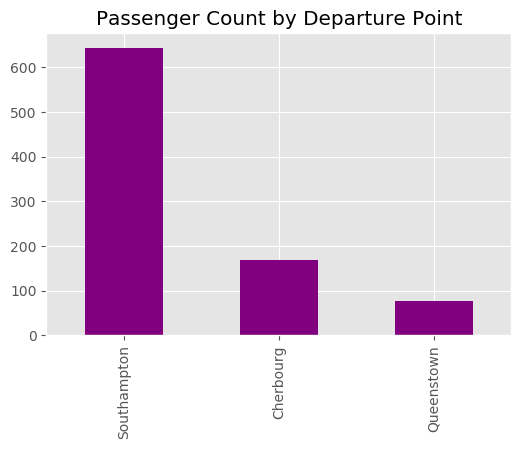

In [76]:
titanic.embark_town.value_counts().plot(kind='bar', color='blue',
                                       title="Passenger Count by Departure Point")

In [87]:
embark = pd.get_dummies(titanic['embark_town'])
embark.head()

,Cherbourg,Queenstown,Southampton
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
titanic['Cherbourg'] = embark['Cherbourg']
titanic['Queenstown'] = embark['Queenstown']
titanic['Southampton'] = embark['Southampton']

In [ ]:
# Set up a factorplot
g = sns.factorplot("class", "survived", "sex", data=titanic, kind="bar", size=6, aspect=2, palette="muted", legend=False)

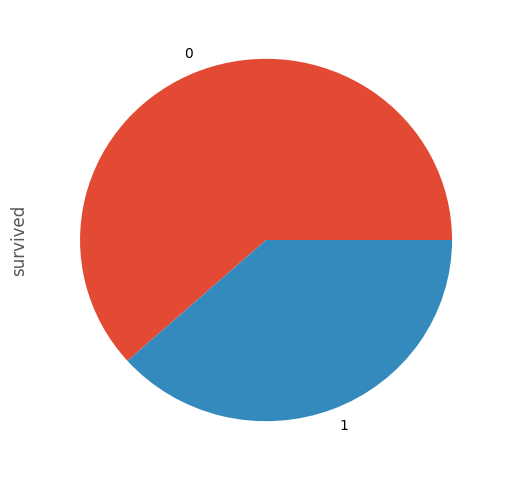

In [91]:
# Pie chart - alive (yes/no)?
titanic.survived.value_counts().plot(kind='pie', figsize=(6, 6))

In [93]:
titanic.survived.mean()

0.3838383838383838

In [94]:
titanic.groupby('survived').mean()

,pclass,age,sibsp,parch,fare,adult_male,alone
survived,,,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887,0.817851,0.681239
1,1.950292,28.343690,0.473684,0.464912,48.395408,0.257310,0.476608


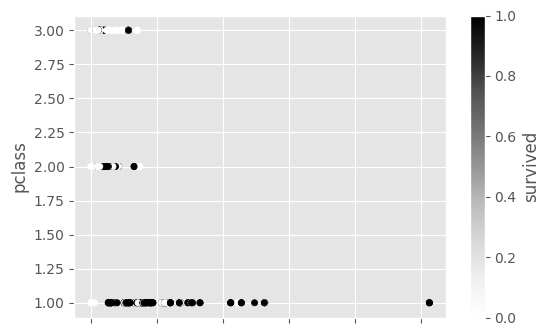

In [97]:
titanic.plot(x='fare', y='pclass', kind='bar', c='survived')

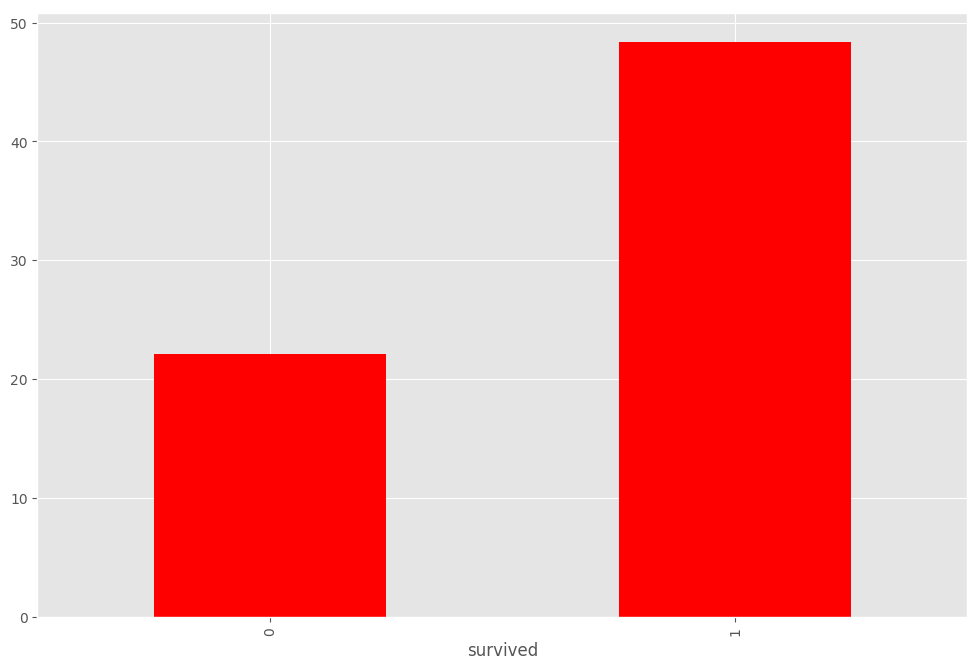

In [110]:
titanic.groupby('survived').mean()['fare'].plot(kind='bar',
                                               color='red',
                                               figsize=(12,8))
plt.savefig('titanic_fare.png')

In [ ]:
titanic.groupby('pclass').mean()

In [ ]:
random.seed(7)

X_vars = titanic.drop(['survived','alive','embark_town'], axis=1) # Delete 'alive' column, because it's the same as 'survived'
y_var = titanic.survived

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression()

titanic_knn =  knn.fit(X_vars, y_var)
titanic_logit = logistic.fit(X_vars, y_var)